In [1]:
import rdkit
from rdkit import Chem
import os
import pandas as pd
import numpy as np
import sys
sys.path.append('./utils')
from vaeutils import *
import warnings
warnings.filterwarnings(action='ignore')
from rdkit import rdBase
rdBase.DisableLog('rdApp.warning')
from tqdm.notebook import tqdm
tqdm.pandas()
seed_everything(42)

sys.path.append('./utils/utility')
sys.path.append('./utils/qsar')

from Featurizer import Featurize
from Data_pipeline import QSAR_pipeline

reading NP model ...
model in


# 1. Molecular descriptors and fingerprints calculation

In [2]:
RUN = 'VEGFR2'
df = pd.read_csv("data/VEGFR2.csv")
smiles_col = 'rdkit_SMILES'
activity_col = 'pIC50'
df['ID'] = pd.Series(range(len(df)))
ID_col = 'ID'
df.head(2)

,rdkit_SMILES,pIC50,References_type,References_detail,Year,MOSES_passed,vocab_checked,ID
0,CNC(=O)c1c(C)oc2cc(Oc3ccnc4cc(C(=O)N5CCC(OC)C5...,9.853872,Patent,PFIZER INC; CORTICAL; US2004/9965; (2004); A1;,2004,YES,True,0
1,CNC(=O)Nc1ccc(Oc2ncnc3cc(OCCCN4CCCCC4)c(OC)cc2...,9.698970,Patent,Kyowa Kirin (in: Kirin Holdings); KIRIN HOLDI...,2004,YES,True,1


In [3]:
df.shape

(4770, 8)

In [4]:
folder = './raw_data_features/' + RUN
isExist = os.path.exists(folder)
if not isExist:
    os.makedirs(folder)
save_dir = folder+"/"
fp = Featurize(data=df, smile_col=smiles_col, activity_col=activity_col, m2v_path = 'utils/utility/model_300dim.pkl',
            ID=ID_col, save_dir=save_dir, standardize = False)
fp.Apply()

COVERTING SMILES TO MOLECULES...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING RDK5 FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING RDK6 FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING RDK7 FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING ECFP2 FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING ECFP4 FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING ECFP6 FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING MACCs FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING AVALON FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING PUBCHEM FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING MAP4 FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING SECFP FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING PHARMACOPHORE GOBBI FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING PHARMACOPHORE CATS2D FINGERPRINTS...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING RDKit descriptors...


  0%|          | 0/4770 [00:00<?, ?it/s]

CALCULATING Mordred descriptors...


100%|██████████| 4770/4770 [00:49<00:00, 96.96it/s] 


CALCULATING Mol2vec...


  0%|          | 0/4770 [00:00<?, ?it/s]

FINISH CALCULATING!


# 2. QSAR pipeline

Data name: Avalon.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.618 ± 0.082 (0.605)
>ELN 0.618 ± 0.082 (0.603)
>Huber 0.594 ± 0.092 (0.569)
>PCR 0.257 ± 0.172 (0.279)
>PLS 0.613 ± 0.083 (0.603)
>GPR 0.618 ± 0.082 (0.605)
>KNN 0.732 ± 0.110 (0.757)
>SVM 0.626 ± 0.067 (0.619)
>RF 0.769 ± 0.071 (0.778)
>ExT 0.575 ± 0.174 (0.615)
>ADA 0.176 ± 0.196 (0.210)
>Grad 0.708 ± 0.065 (0.706)
>XGB 0.748 ± 0.088 (0.751)
>CatB 0.785 ± 0.070 (0.787)
>Hist 0.763 ± 0.074 (0.773)
Data name: Cats2d.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.345 ± 0.146 (0.388)
>ELN 0.140 ± 0.137 (0.178)
>Huber 0.302 ± 0.193 (0.337)
>PCR 0.157 ± 0.129 (0.196)
>PLS 0.311 ± 0.153 (0.337)
>GPR 0.345 ± 0.146 (0.387)
>KNN 0.543 ± 0.258 (0.599)
>SVM 0.434 ± 0.161 (0.487)
>RF 0.647 ± 0.129 (0.683)
>ExT 0.677 ± 0.124 (0.710)
>ADA -0.025 ± 0.202 (0.059)
>Grad 0.544 ± 0.112 (0.567)
>XGB 0.630 ± 0.134 (0.668)
>CatB 0.661 ± 0.110 (0.689)
>Hist 0.639 ± 0.126 (0.673)
Data name: ECFP2.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.434 ± 0.142 (0.471)
>ELN 0.433 ± 0.139 (0.467)
>Huber 0.416 ± 0.155 (0.445)
>PCR 0.298 ± 0.136 (0.325)
>PLS 0.434 ± 0.142 (0.472)
>GPR 0.433 ± 0.142 (0.471)
>KNN 0.671 ± 0.130 (0.684)
>SVM 0.594 ± 0.084 (0.603)
>RF 0.709 ± 0.106 (0.730)
>ExT 0.652 ± 0.124 (0.694)
>ADA 0.055 ± 0.222 (0.080)
>Grad 0.642 ± 0.100 (0.674)
>XGB 0.694 ± 0.105 (0.731)
>CatB 0.715 ± 0.086 (0.733)
>Hist 0.690 ± 0.106 (0.728)
Data name: ECFP4.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.553 ± 0.109 (0.543)
>ELN 0.553 ± 0.109 (0.543)
>Huber 0.535 ± 0.121 (0.512)
>PCR 0.416 ± 0.137 (0.400)
>PLS 0.551 ± 0.108 (0.541)
>GPR 0.553 ± 0.109 (0.543)
>KNN 0.717 ± 0.092 (0.718)
>SVM 0.620 ± 0.091 (0.618)
>RF 0.715 ± 0.109 (0.707)
>ExT 0.607 ± 0.159 (0.638)
>ADA -0.091 ± 0.280 (-0.049)
>Grad 0.656 ± 0.093 (0.644)
>XGB 0.732 ± 0.093 (0.727)
>CatB 0.747 ± 0.080 (0.750)
>Hist 0.725 ± 0.095 (0.726)
Data name: ECFP6.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.552 ± 0.113 (0.556)
>ELN 0.550 ± 0.112 (0.545)
>Huber 0.522 ± 0.130 (0.551)
>PCR 0.384 ± 0.131 (0.376)
>PLS 0.548 ± 0.115 (0.553)
>GPR 0.551 ± 0.113 (0.557)
>KNN 0.710 ± 0.101 (0.720)
>SVM 0.609 ± 0.081 (0.610)
>RF 0.731 ± 0.087 (0.746)
>ExT 0.649 ± 0.101 (0.652)
>ADA -0.027 ± 0.247 (-0.018)
>Grad 0.674 ± 0.086 (0.688)
>XGB 0.726 ± 0.084 (0.740)
>CatB 0.750 ± 0.084 (0.760)
>Hist 0.708 ± 0.091 (0.714)
Data name: MACCs.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.279 ± 0.182 (0.292)
>ELN 0.177 ± 0.131 (0.217)
>Huber 0.236 ± 0.234 (0.288)
>PCR 0.262 ± 0.160 (0.258)
>PLS 0.278 ± 0.183 (0.290)
>GPR 0.279 ± 0.182 (0.292)
>KNN 0.513 ± 0.231 (0.551)
>SVM 0.459 ± 0.169 (0.462)
>RF 0.515 ± 0.223 (0.587)
>ExT 0.332 ± 0.282 (0.384)
>ADA 0.081 ± 0.160 (0.107)
>Grad 0.494 ± 0.145 (0.510)
>XGB 0.484 ± 0.241 (0.509)
>CatB 0.531 ± 0.218 (0.572)
>Hist 0.541 ± 0.180 (0.560)
Data name: Map4.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.511 ± 0.110 (0.529)
>ELN 0.488 ± 0.145 (0.514)
>Huber 0.505 ± 0.113 (0.516)
>PCR 0.420 ± 0.118 (0.427)
>PLS 0.508 ± 0.111 (0.529)
>GPR 0.510 ± 0.110 (0.528)
>KNN 0.730 ± 0.095 (0.744)
>SVM 0.524 ± 0.097 (0.525)
>RF 0.585 ± 0.094 (0.602)
>ExT 0.036 ± 0.201 (0.083)
>ADA 0.129 ± 0.145 (0.141)
>Grad 0.545 ± 0.113 (0.565)
>XGB 0.585 ± 0.098 (0.583)
>CatB 0.662 ± 0.097 (0.675)
>Hist 0.619 ± 0.100 (0.628)
Data name: Mol2vec.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.346 ± 0.140 (0.378)
>ELN 0.125 ± 0.181 (0.037)
>Huber 0.305 ± 0.156 (0.306)
>PCR 0.158 ± 0.122 (0.177)
>PLS 0.318 ± 0.155 (0.346)
>GPR 0.342 ± 0.140 (0.374)
>KNN 0.580 ± 0.120 (0.609)
>SVM 0.526 ± 0.106 (0.533)
>RF 0.538 ± 0.096 (0.549)
>ExT 0.571 ± 0.092 (0.594)
>ADA -0.031 ± 0.202 (-0.059)
>Grad 0.462 ± 0.108 (0.493)
>XGB 0.534 ± 0.093 (0.548)
>CatB 0.600 ± 0.091 (0.631)
>Hist 0.561 ± 0.096 (0.577)
Data name: Mordred.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.423 ± 0.129 (0.434)
>ELN 0.235 ± 0.101 (0.232)
>Huber 0.412 ± 0.158 (0.423)
>PCR 0.165 ± 0.119 (0.186)
>PLS 0.394 ± 0.128 (0.396)
>GPR 0.435 ± 0.137 (0.442)
>KNN 0.590 ± 0.120 (0.606)
>SVM 0.552 ± 0.105 (0.556)
>RF 0.661 ± 0.106 (0.683)
>ExT 0.715 ± 0.105 (0.728)
>ADA 0.094 ± 0.193 (0.070)
>Grad 0.600 ± 0.109 (0.597)
>XGB 0.661 ± 0.107 (0.678)
>CatB 0.701 ± 0.096 (0.708)
>Hist 0.681 ± 0.107 (0.699)
Data name: Ph4.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.638 ± 0.075 (0.656)
>ELN 0.624 ± 0.088 (0.633)
>Huber 0.622 ± 0.098 (0.628)
>PCR 0.360 ± 0.148 (0.393)
>PLS 0.635 ± 0.077 (0.631)
>GPR 0.637 ± 0.076 (0.654)
>KNN 0.687 ± 0.146 (0.709)
>SVM 0.601 ± 0.088 (0.605)
>RF 0.744 ± 0.101 (0.780)
>ExT 0.601 ± 0.116 (0.618)
>ADA 0.155 ± 0.170 (0.176)
>Grad 0.700 ± 0.079 (0.696)
>XGB 0.730 ± 0.091 (0.751)
>CatB 0.758 ± 0.077 (0.769)
>Hist 0.759 ± 0.080 (0.764)
Data name: Pubchem.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.376 ± 0.131 (0.419)
>ELN 0.215 ± 0.107 (0.255)
>Huber 0.332 ± 0.144 (0.338)
>PCR 0.243 ± 0.171 (0.275)
>PLS 0.370 ± 0.138 (0.406)
>GPR 0.373 ± 0.131 (0.418)
>KNN 0.643 ± 0.104 (0.644)
>SVM 0.555 ± 0.114 (0.575)
>RF 0.596 ± 0.201 (0.671)
>ExT 0.389 ± 0.286 (0.472)
>ADA 0.011 ± 0.269 (0.094)
>Grad 0.572 ± 0.139 (0.599)
>XGB 0.608 ± 0.168 (0.658)
>CatB 0.658 ± 0.130 (0.694)
>Hist 0.627 ± 0.158 (0.664)
Data name: RDK5.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.632 ± 0.085 (0.623)
>ELN 0.508 ± 0.166 (0.548)
>Huber 0.618 ± 0.106 (0.624)
>PCR 0.442 ± 0.132 (0.458)
>PLS 0.627 ± 0.087 (0.611)
>GPR 0.631 ± 0.084 (0.623)
>KNN 0.729 ± 0.099 (0.737)
>SVM 0.619 ± 0.058 (0.619)
>RF 0.748 ± 0.086 (0.773)
>ExT 0.588 ± 0.126 (0.597)
>ADA 0.070 ± 0.191 (0.097)
>Grad 0.704 ± 0.087 (0.715)
>XGB 0.732 ± 0.093 (0.750)
>CatB 0.768 ± 0.074 (0.787)
>Hist 0.738 ± 0.082 (0.742)
Data name: RDK6.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.629 ± 0.105 (0.642)
>ELN 0.610 ± 0.116 (0.609)
>Huber 0.619 ± 0.111 (0.603)
>PCR 0.349 ± 0.146 (0.371)
>PLS 0.637 ± 0.106 (0.651)
>GPR 0.627 ± 0.105 (0.640)
>KNN 0.734 ± 0.102 (0.755)
>SVM 0.624 ± 0.079 (0.646)
>RF 0.742 ± 0.087 (0.753)
>ExT 0.542 ± 0.172 (0.587)
>ADA 0.127 ± 0.167 (0.091)
>Grad 0.693 ± 0.093 (0.704)
>XGB 0.735 ± 0.086 (0.756)
>CatB 0.774 ± 0.078 (0.796)
>Hist 0.740 ± 0.085 (0.759)
Data name: RDK7.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.658 ± 0.095 (0.674)
>ELN 0.706 ± 0.093 (0.731)
>Huber 0.660 ± 0.119 (0.693)
>PCR 0.365 ± 0.143 (0.389)
>PLS 0.693 ± 0.096 (0.715)
>GPR 0.653 ± 0.096 (0.669)
>KNN 0.747 ± 0.095 (0.762)
>SVM 0.599 ± 0.080 (0.614)
>RF 0.772 ± 0.077 (0.789)
>ExT 0.552 ± 0.157 (0.594)
>ADA 0.187 ± 0.166 (0.209)
>Grad 0.725 ± 0.090 (0.747)
>XGB 0.739 ± 0.082 (0.752)
>CatB 0.787 ± 0.080 (0.804)
>Hist 0.770 ± 0.077 (0.776)
Data name: RDKdes.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.295 ± 0.118 (0.285)
>ELN 0.294 ± 0.120 (0.287)
>Huber 0.272 ± 0.124 (0.284)
>PCR 0.111 ± 0.099 (0.118)
>PLS 0.295 ± 0.121 (0.294)
>GPR 0.294 ± 0.120 (0.286)
>KNN 0.517 ± 0.151 (0.518)
>SVM 0.506 ± 0.110 (0.523)
>RF 0.616 ± 0.125 (0.642)
>ExT 0.655 ± 0.126 (0.676)
>ADA 0.020 ± 0.211 (0.021)
>Grad 0.525 ± 0.120 (0.537)
>XGB 0.595 ± 0.127 (0.595)
>CatB 0.639 ± 0.116 (0.649)
>Hist 0.623 ± 0.113 (0.632)
Data name: Secfp.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Using Transformed Target Regressor
Using Transformed Target Regressor
>Ridge 0.537 ± 0.098 (0.553)
>ELN 0.333 ± 0.251 (0.430)
>Huber 0.507 ± 0.119 (0.496)
>PCR 0.382 ± 0.154 (0.397)
>PLS 0.537 ± 0.098 (0.547)
>GPR 0.536 ± 0.098 (0.552)
>KNN 0.690 ± 0.145 (0.721)
>SVM 0.590 ± 0.095 (0.591)
>RF 0.738 ± 0.090 (0.749)
>ExT 0.639 ± 0.120 (0.629)
>ADA 0.136 ± 0.262 (0.143)
>Grad 0.665 ± 0.079 (0.666)
>XGB 0.714 ± 0.101 (0.739)
>CatB 0.734 ± 0.089 (0.747)
>Hist 0.720 ± 0.090 (0.721)
META DATA SAVING...
Avalon     0.613
Cats2d     0.423
ECFP2      0.525
ECFP4      0.573
ECFP6      0.576
MACCs      0.364
Map4       0.490
Mol2vec    0.396
Mordred    0.488
Ph4        0.617
Pubchem    0.438
RDK5       0.610
RDK6       0.612
RDK7       0.641
RDKdes     0.417
Secfp      0.564
dtype: float64
META DATA SAVING...
Avalon     0.785
Cats2d     0.677
ECFP2      0.715
ECFP4      0.747
ECFP6      0.750
MACCs      0.541
Map4       0.730
Mol2vec    0.600
Mordred    0.715
Ph4        0.759
Pubchem    0.658
RDK5 

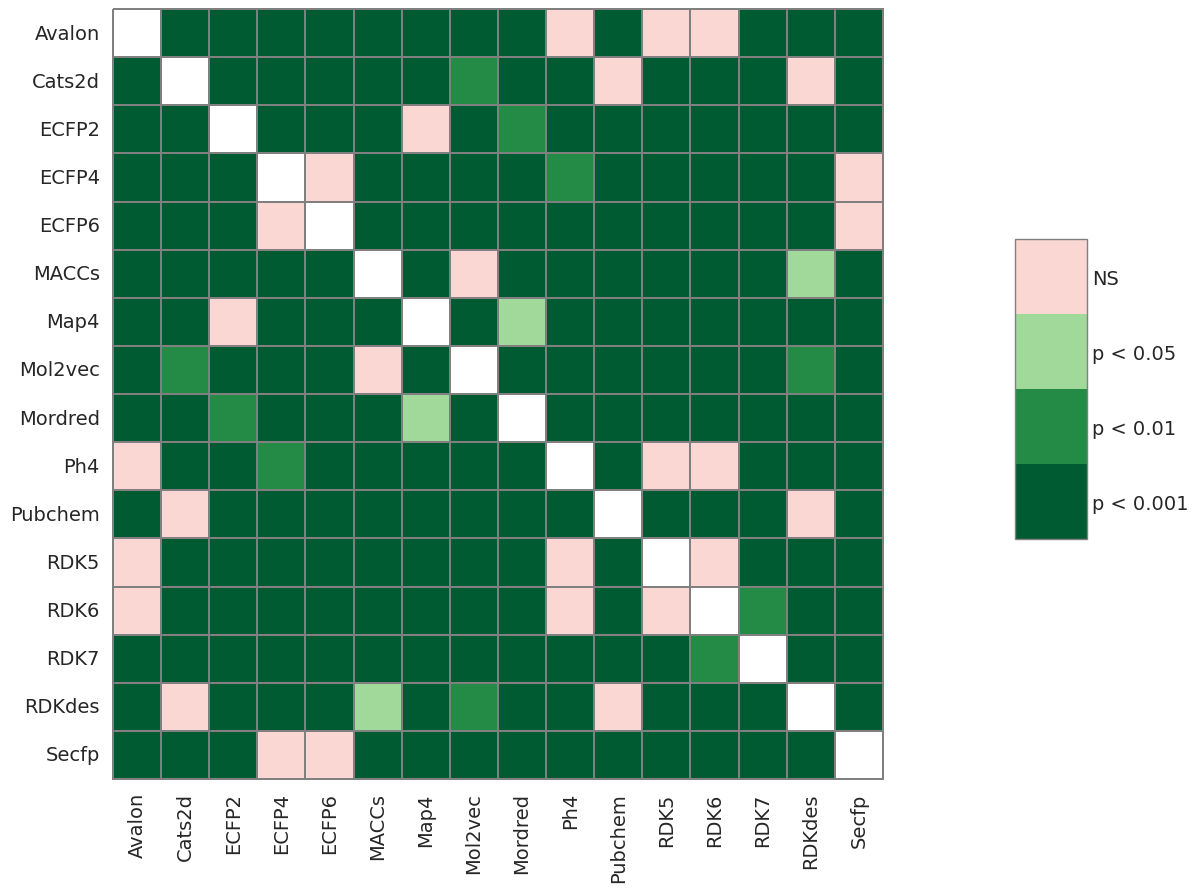

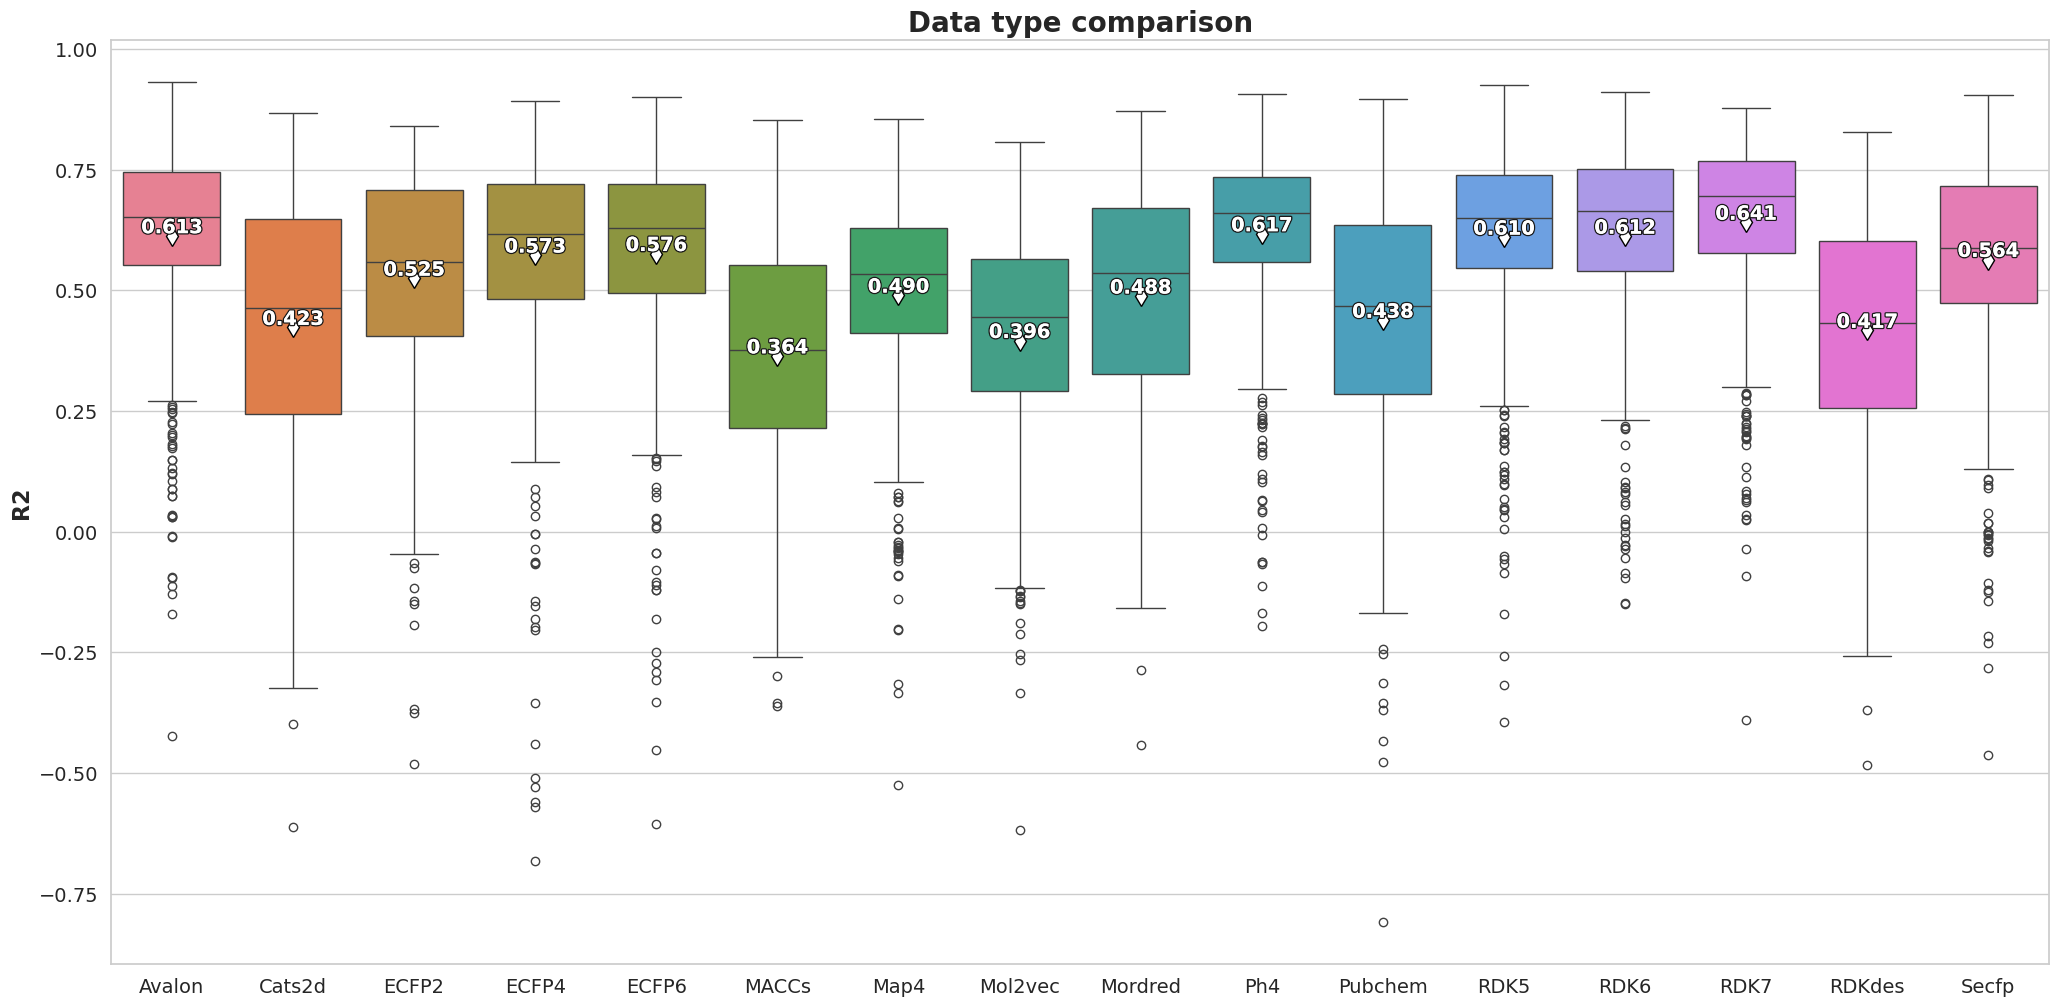

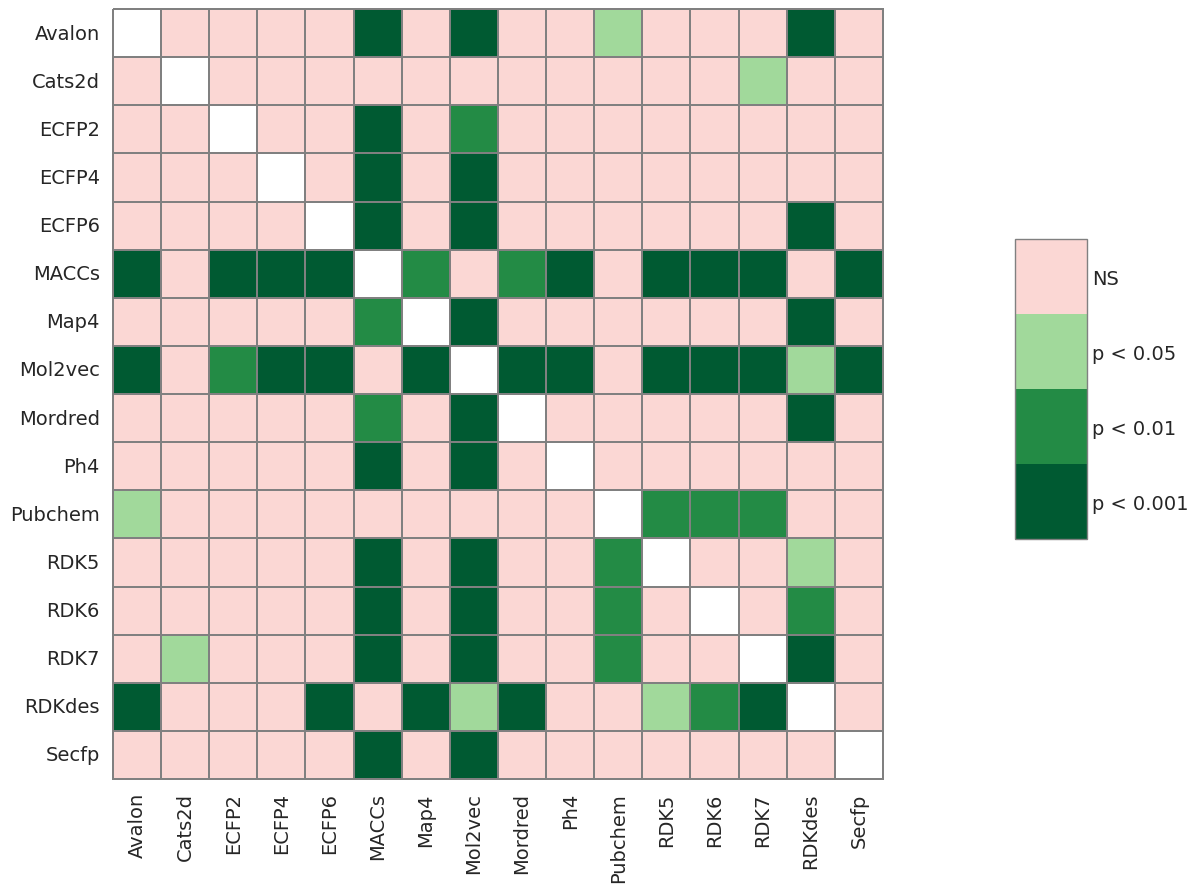

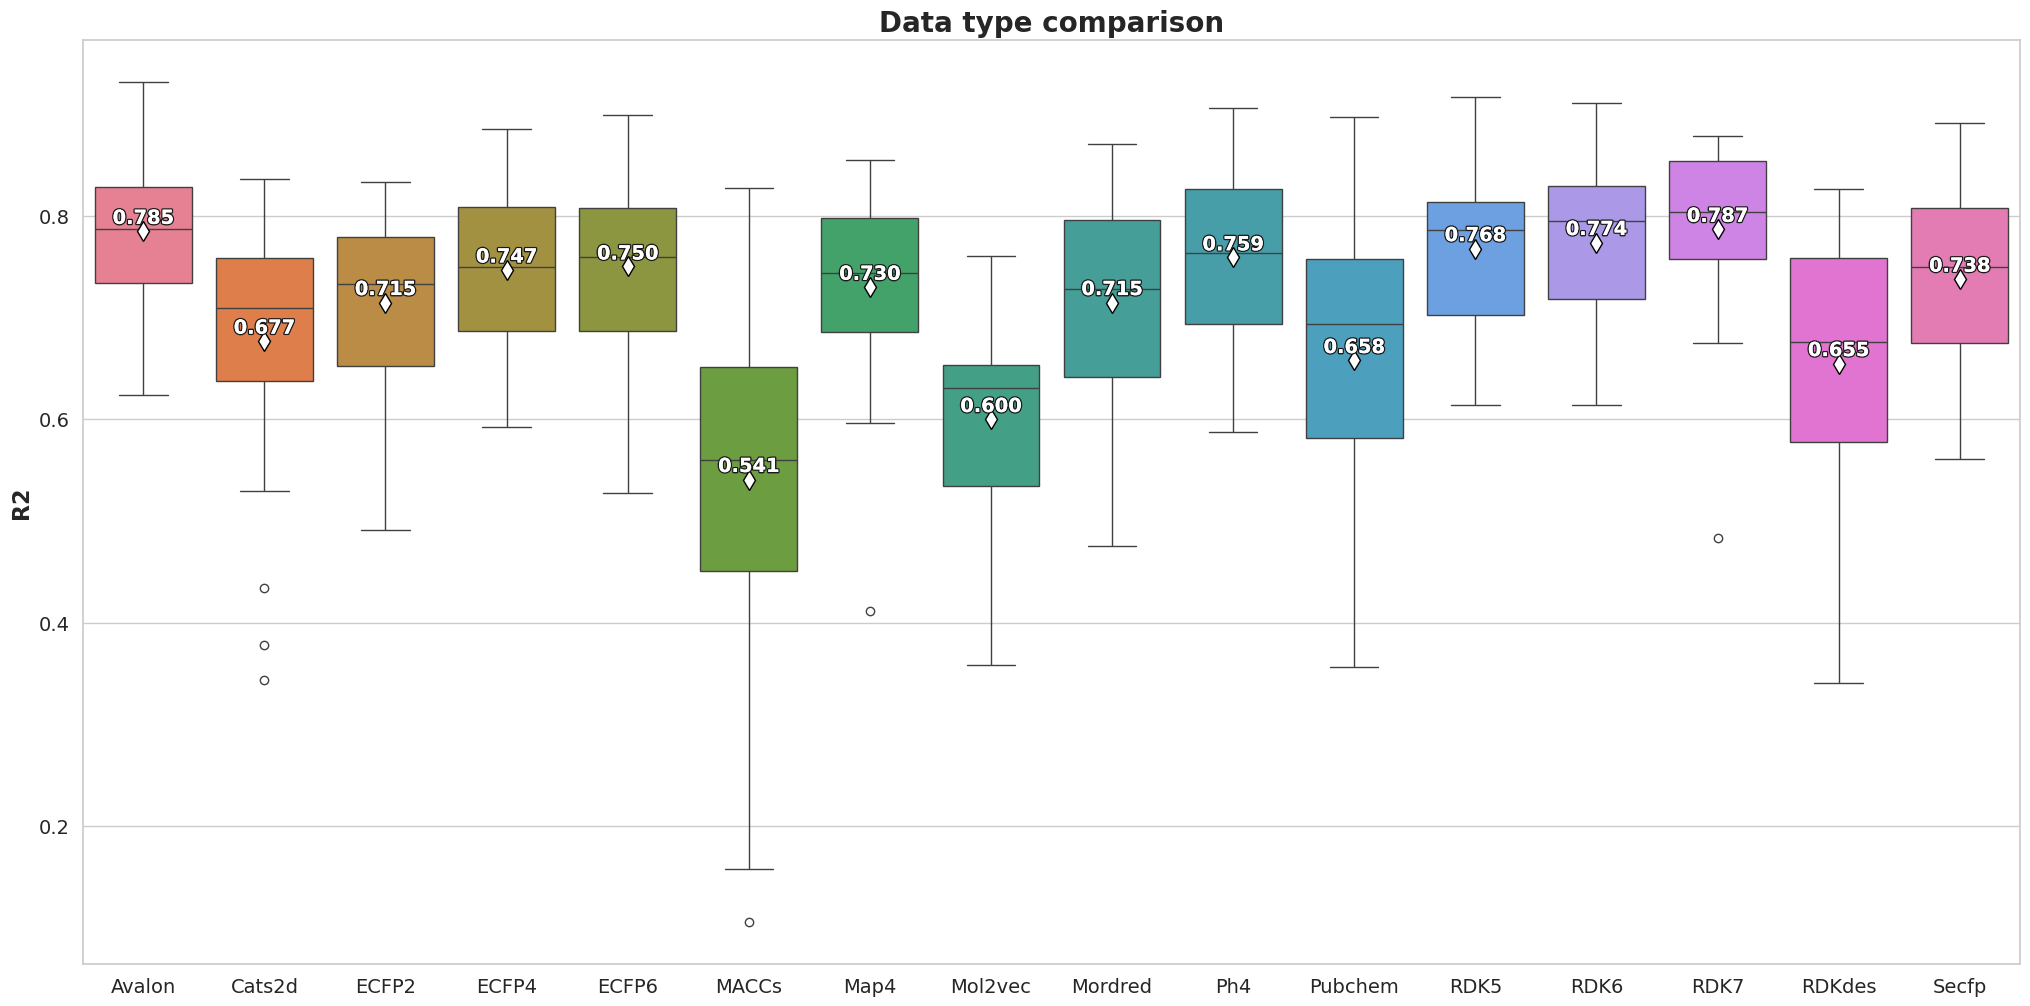

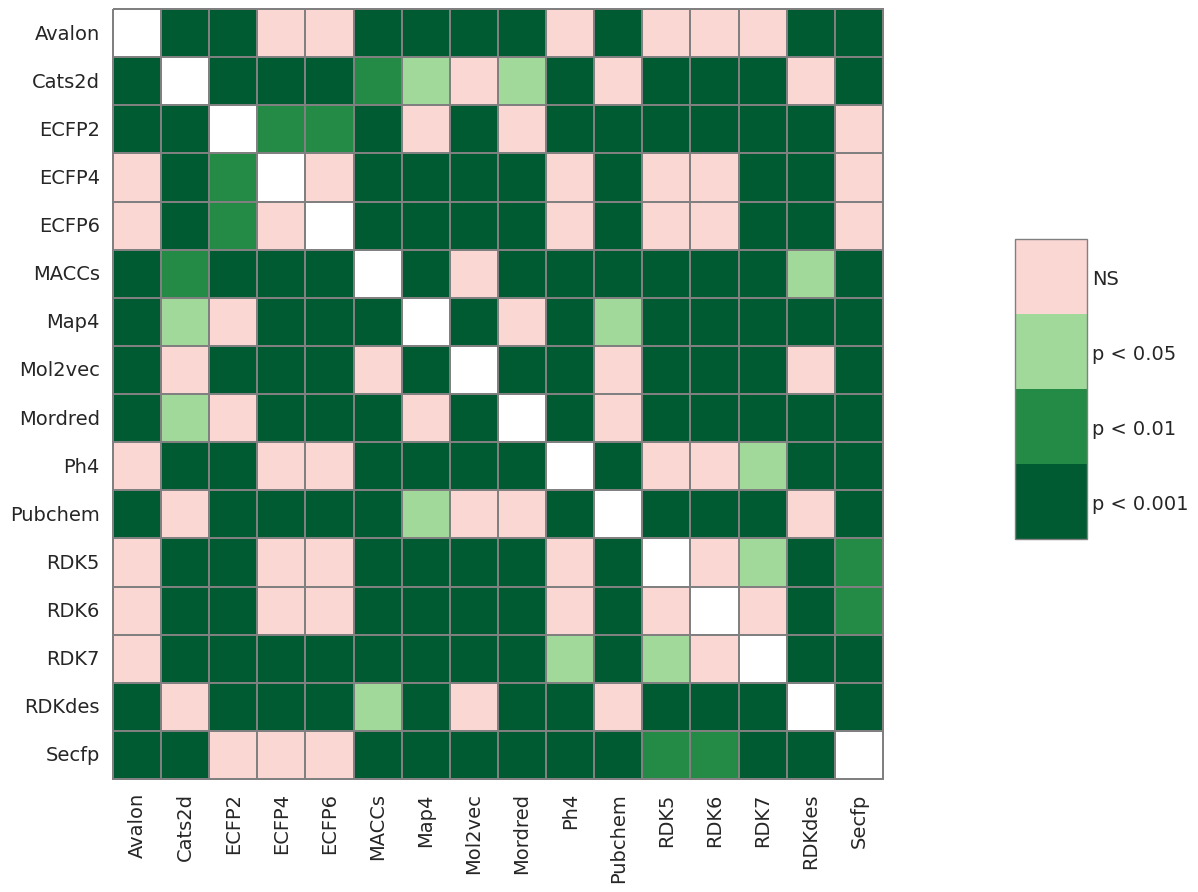

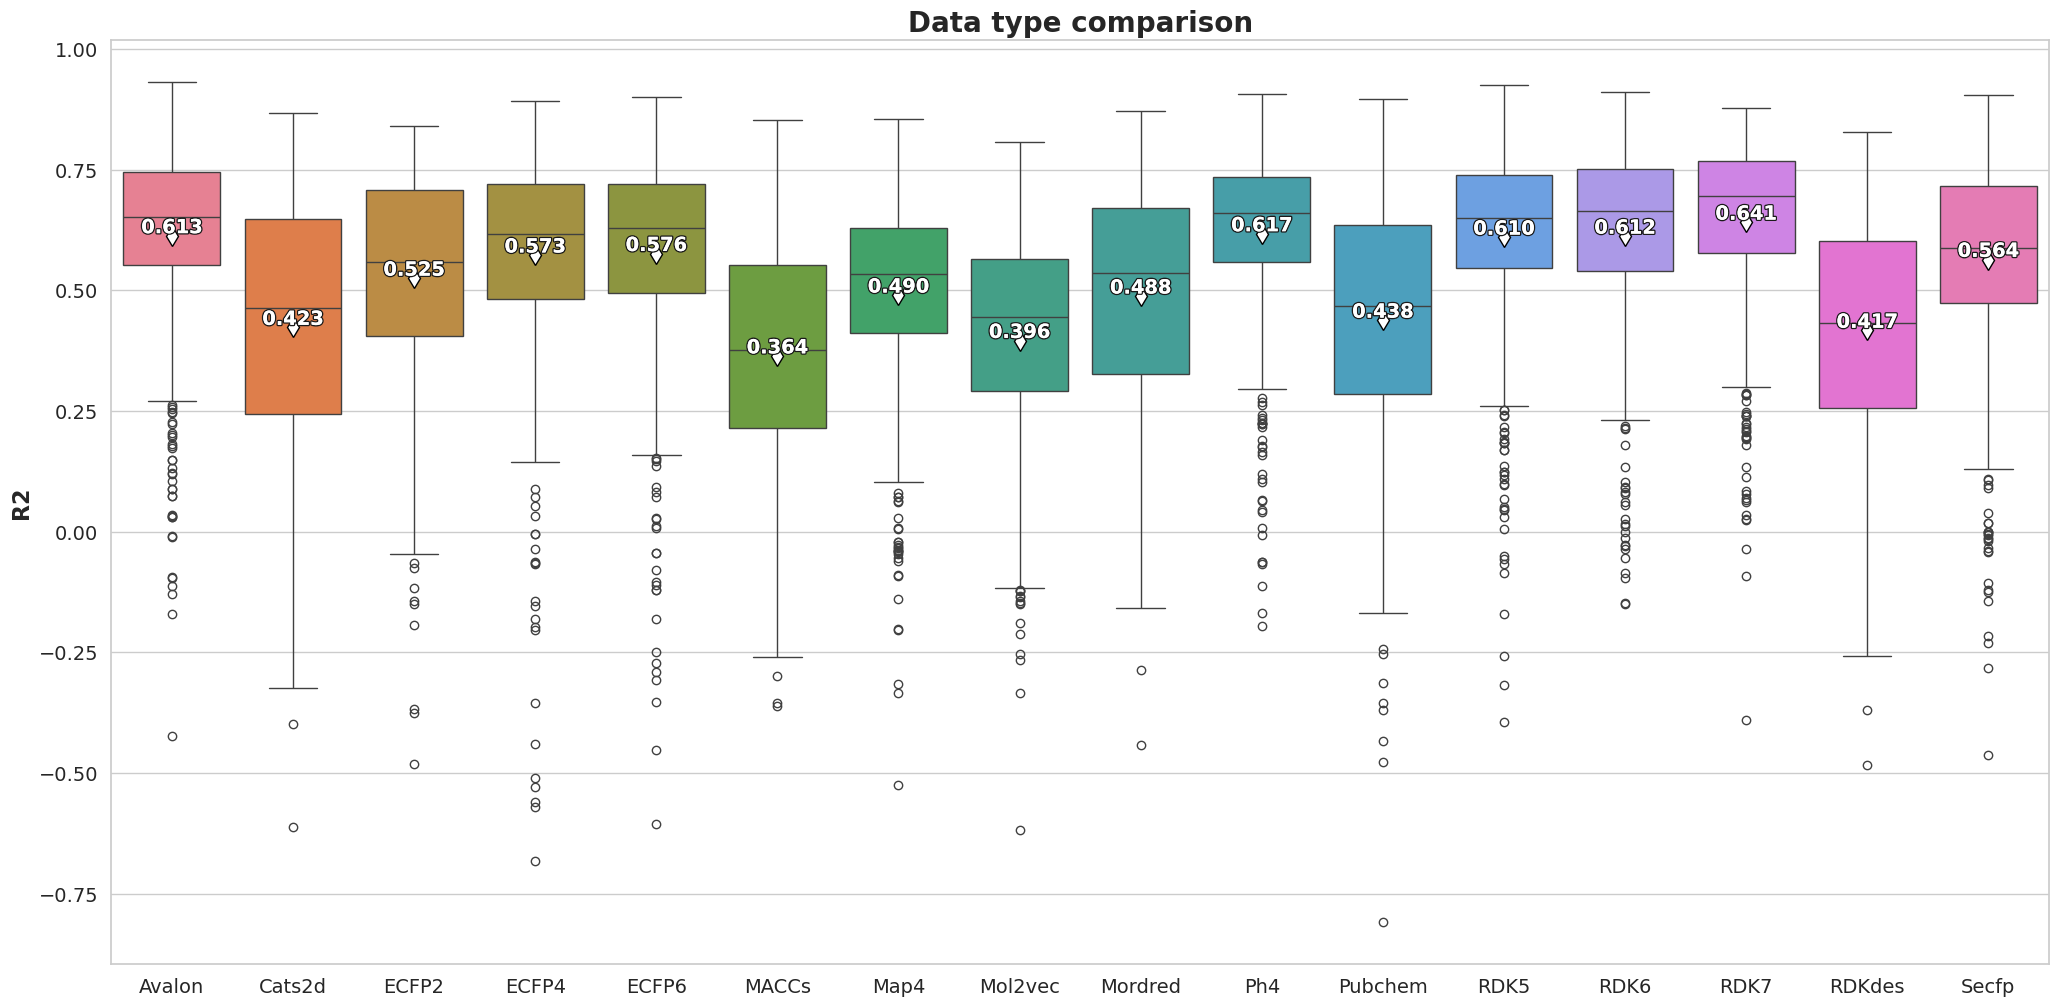

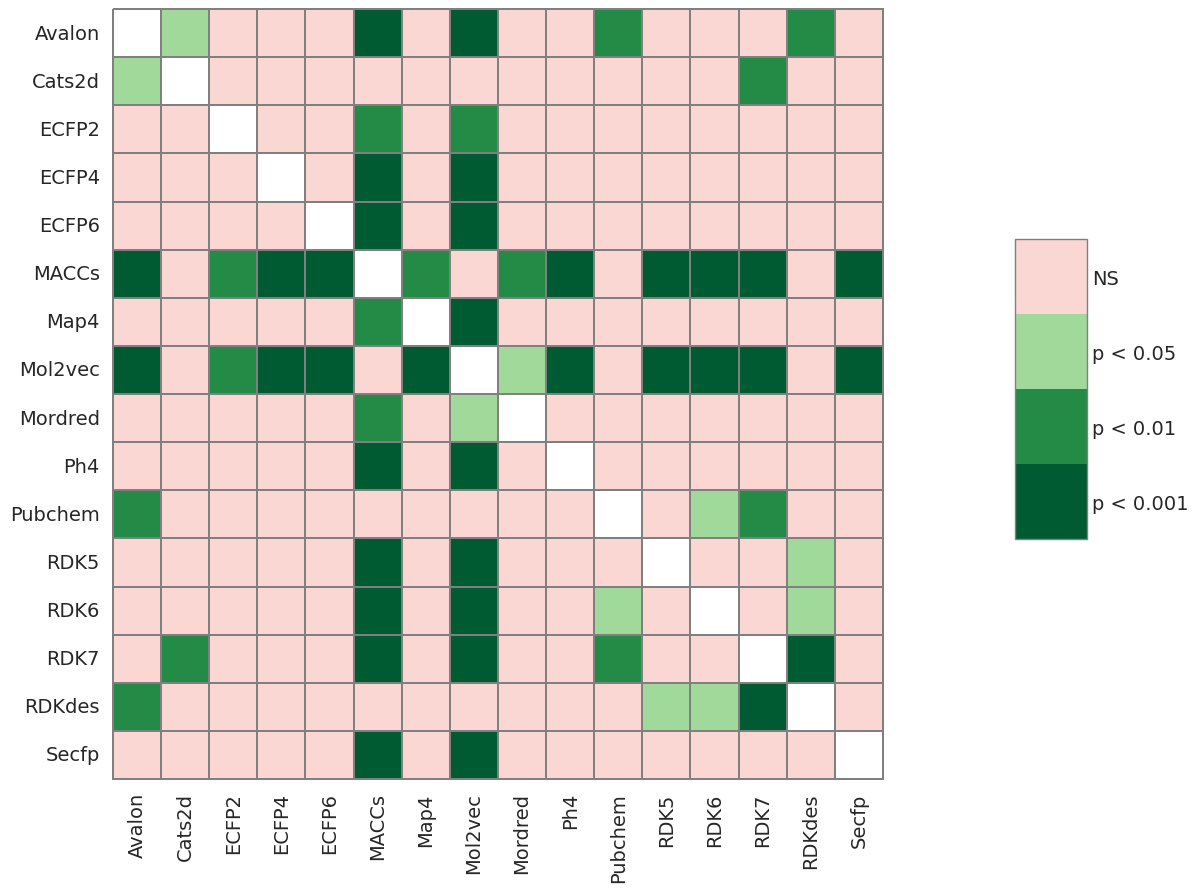

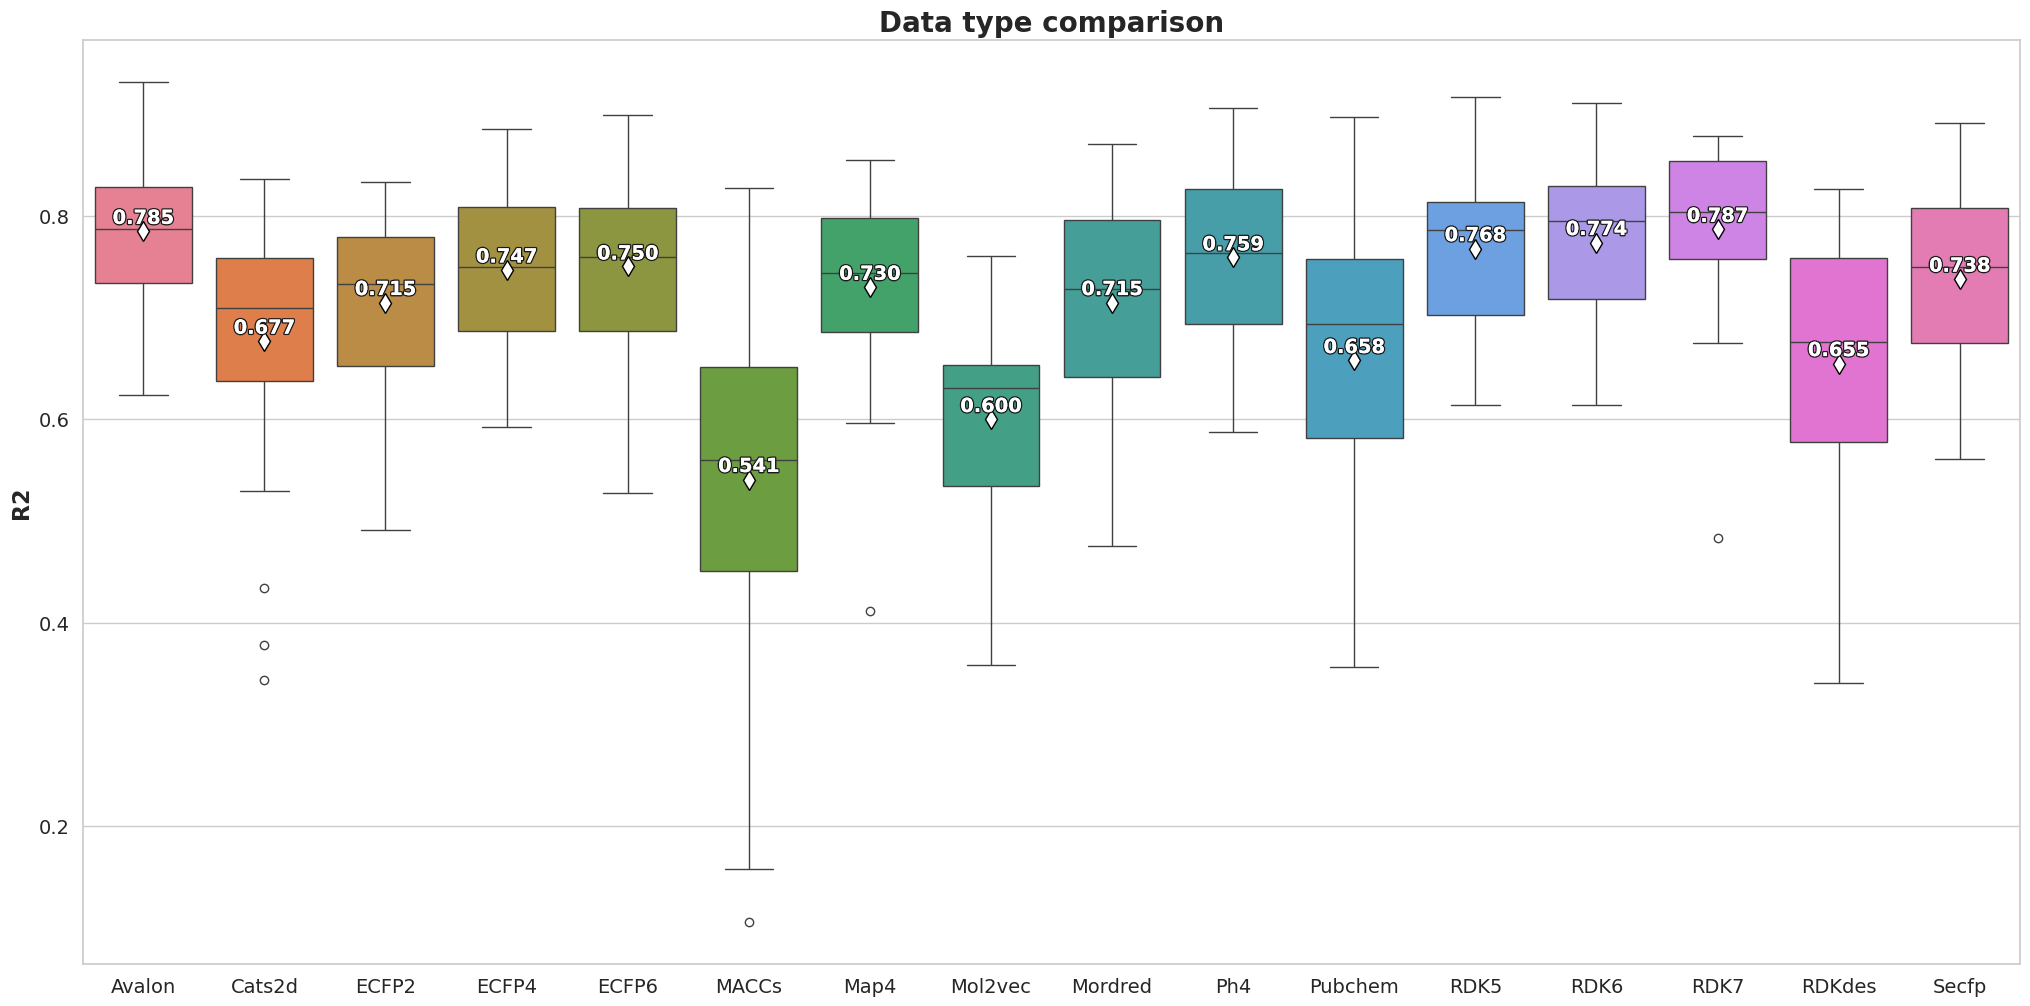

In [5]:
import os
os.environ['PYTHONWARNINGS']='ignore'
data_path = './raw_data_features/' + RUN
pip  = QSAR_pipeline(data_path=data_path,  task_type ='R', scoring ='r2',kind_analysis =['Meta','Subgroup'],
                     activity_col=activity_col, save_data = True, posthoc_method =['Wilcoxon', 'Mannwhitney'], 
                     scale_x = 'MinMaxScaler', scale_y = 'MinMaxScaler', smiles_col = smiles_col,
                    verbose=False)
pip.fit()